**20L-1360**

**Saadan Atif**

**BDS-8A**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Lambda
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Layer
import keras

# **Loading the Cifar-10 dataset**

In [27]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

170498071/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

# **Data preprocessing**

In [29]:
# Scaling data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hotencoding of target variables
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

# **Model building**

In [21]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32, 32, 3), kernel_size=(11,11), strides=(2,2), padding='valid', activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'))
model.add(Lambda(tf.nn.local_response_normalization))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(Lambda(tf.nn.local_response_normalization))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Flattening
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, activation='relu'))

# Dropout
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 11, 11, 96)        34944     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 9, 9, 96)          0         
 ng2D)                                                           
                                                                 
 lambda (Lambda)             (None, 9, 9, 96)          0         
                                                                 
 conv2d_23 (Conv2D)          (None, 9, 9, 256)         614656    
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 4, 4, 256)         0         
 ng2D)                                                           
                                                                 
 lambda_1 (Lambda)           (None, 4, 4, 256)       

In [30]:
model.compile(
         optimizer=keras.optimizers.Adam(learning_rate=1e-4),
         loss='categorical_crossentropy',
         metrics=['accuracy'])

# **Data augmentation**

In [44]:
import copy
train_datagen = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = copy.deepcopy(train_datagen)

test_generator = test_datagen.flow(X_test, y_cat_test, batch_size=32)
train_generator = train_datagen.flow(X_train, y_cat_train, batch_size=32)

# **Training model**

In [45]:
X_train.shape[0]

50000

In [46]:
history = model.fit(train_generator,
                    epochs=50,
                    steps_per_epoch=1562,
                    validation_data=(X_test, y_cat_test),
                    shuffle=True,)

Epoch 1/50
1562/1562 [==============================] - 42s 24ms/step - loss: 2.1345 - accuracy: 0.1777 - val_loss: 1.9647 - val_accuracy: 0.2457
Epoch 2/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.9165 - accuracy: 0.2684 - val_loss: 1.7948 - val_accuracy: 0.3295
Epoch 3/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.8039 - accuracy: 0.3210 - val_loss: 1.6817 - val_accuracy: 0.3762
Epoch 4/50
1562/1562 [==============================] - 38s 24ms/step - loss: 1.7109 - accuracy: 0.3640 - val_loss: 1.5889 - val_accuracy: 0.4088
Epoch 5/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.6355 - accuracy: 0.3939 - val_loss: 1.5495 - val_accuracy: 0.4239
Epoch 6/50
1562/1562 [==============================] - 38s 25ms/step - loss: 1.5831 - accuracy: 0.4156 - val_loss: 1.4896 - val_accuracy: 0.4553
Epoch 7/50
1562/1562 [==============================] - 38s 24ms/step - loss: 1.5522 - accuracy: 0.4281 - val_loss: 1.4932 -

# **Saving the model**

In [47]:
from keras.models import load_model

model.save('alexnet_model_LRN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Performance Evaluation**

In [48]:
print(f"Training Accuracy: {history.history['accuracy'][-1]}")

Training Accuracy: 0.7011287212371826


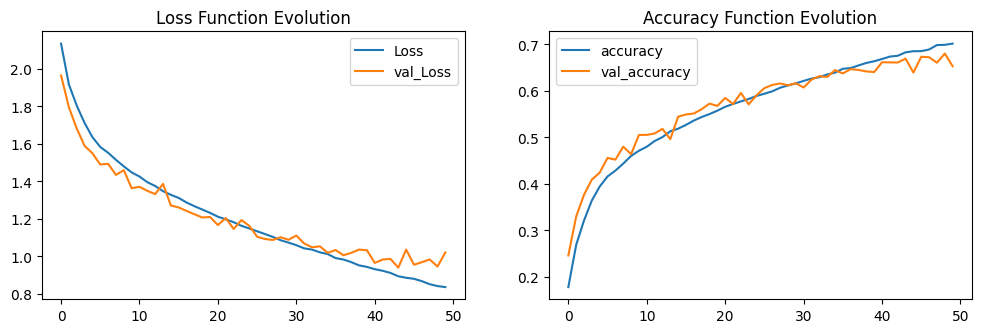

In [49]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [50]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 2s 5ms/step - loss: 1.0205 - accuracy: 0.6526
Test Accuracy : 65.26%
313/313 [==============================] - 1s 3ms/step


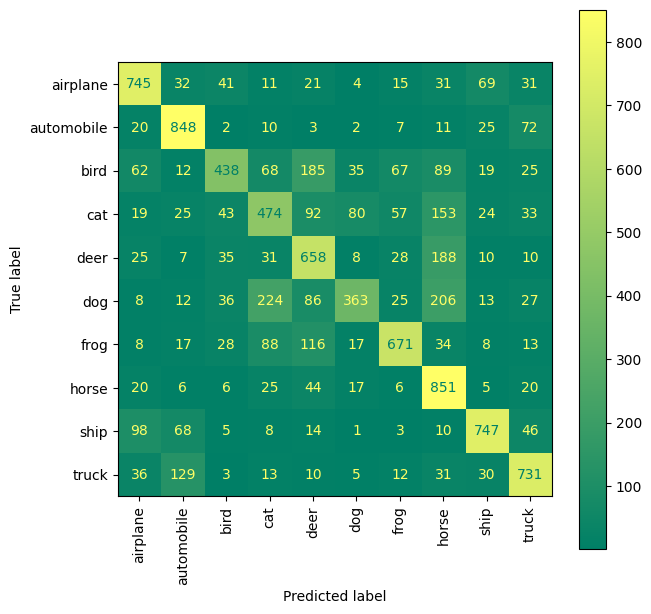

In [51]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

fig, ax = plt.subplots(figsize=(7, 7))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.73      0.85      0.79      1000
           2       0.69      0.44      0.54      1000
           3       0.50      0.47      0.49      1000
           4       0.54      0.66      0.59      1000
           5       0.68      0.36      0.47      1000
           6       0.75      0.67      0.71      1000
           7       0.53      0.85      0.65      1000
           8       0.79      0.75      0.77      1000
           9       0.73      0.73      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



# **TOP1 and TOP5 error**

In [55]:
# Make predictions on the test set
predictions = model.predict(test_generator)

# Calculate Top-1 and Top-5 errors
top1_error = 0
top5_error = 0
total_samples = len(y_test)

for i in range(total_samples):
    true_label = y_test[i]
    predicted_probs = predictions[i]
    top_5_predicted_classes = predicted_probs.argsort()[-5:][::-1]  # Get indices of top 5 predicted classes

    if true_label == top_5_predicted_classes[0]:
        top1_error += 1

    if true_label not in top_5_predicted_classes:
        top5_error += 1

top1_error_percent = (top1_error / total_samples) * 100
top5_error_percent = (top5_error / total_samples) * 100

print("Top-1 Error: {:.2f}%".format(top1_error_percent))
print("Top-5 Error: {:.2f}%".format(top5_error_percent))


313/313 [==============================] - 8s 26ms/step
Top-1 Error: 9.75%
Top-5 Error: 50.68%




# **Testing model**

In [53]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

 Image 100 is [4]
1/1 [==============================] - 0s 23ms/step
The model predict that image 100 label is 4(deer)


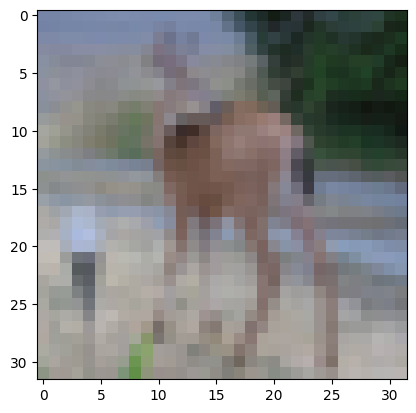

In [ ]:
img=100
my_image = X_test[img]
plt.imshow(my_image)

print(f" Image {img} is {y_test[img]}")

# predicted correct
pred_ = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image {img} label is {pred_}({labels[pred_]})")

 Image 20 is [7]
1/1 [==============================] - 0s 24ms/step
The model predict that image 20 label is 7(horse)


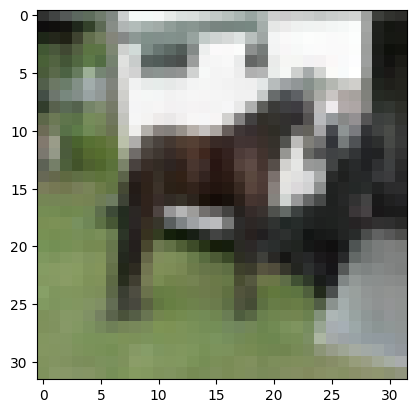

In [ ]:
img=20
my_image = X_test[img]
plt.imshow(my_image)

print(f" Image {img} is {y_test[img]}")

# predicted correct
pred_ = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image {img} label is {pred_}({labels[pred_]})")

 Image 1298 is [9]
1/1 [==============================] - 0s 20ms/step
The model predict that image 1298 label is 9(truck)


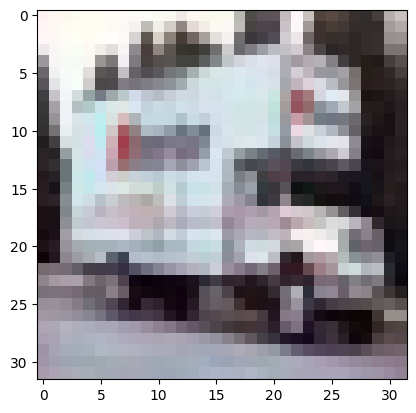

In [ ]:
img=1298
my_image = X_test[img]
plt.imshow(my_image)

print(f" Image {img} is {y_test[img]}")

# predicted correct
pred_ = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image {img} label is {pred_}({labels[pred_]})")

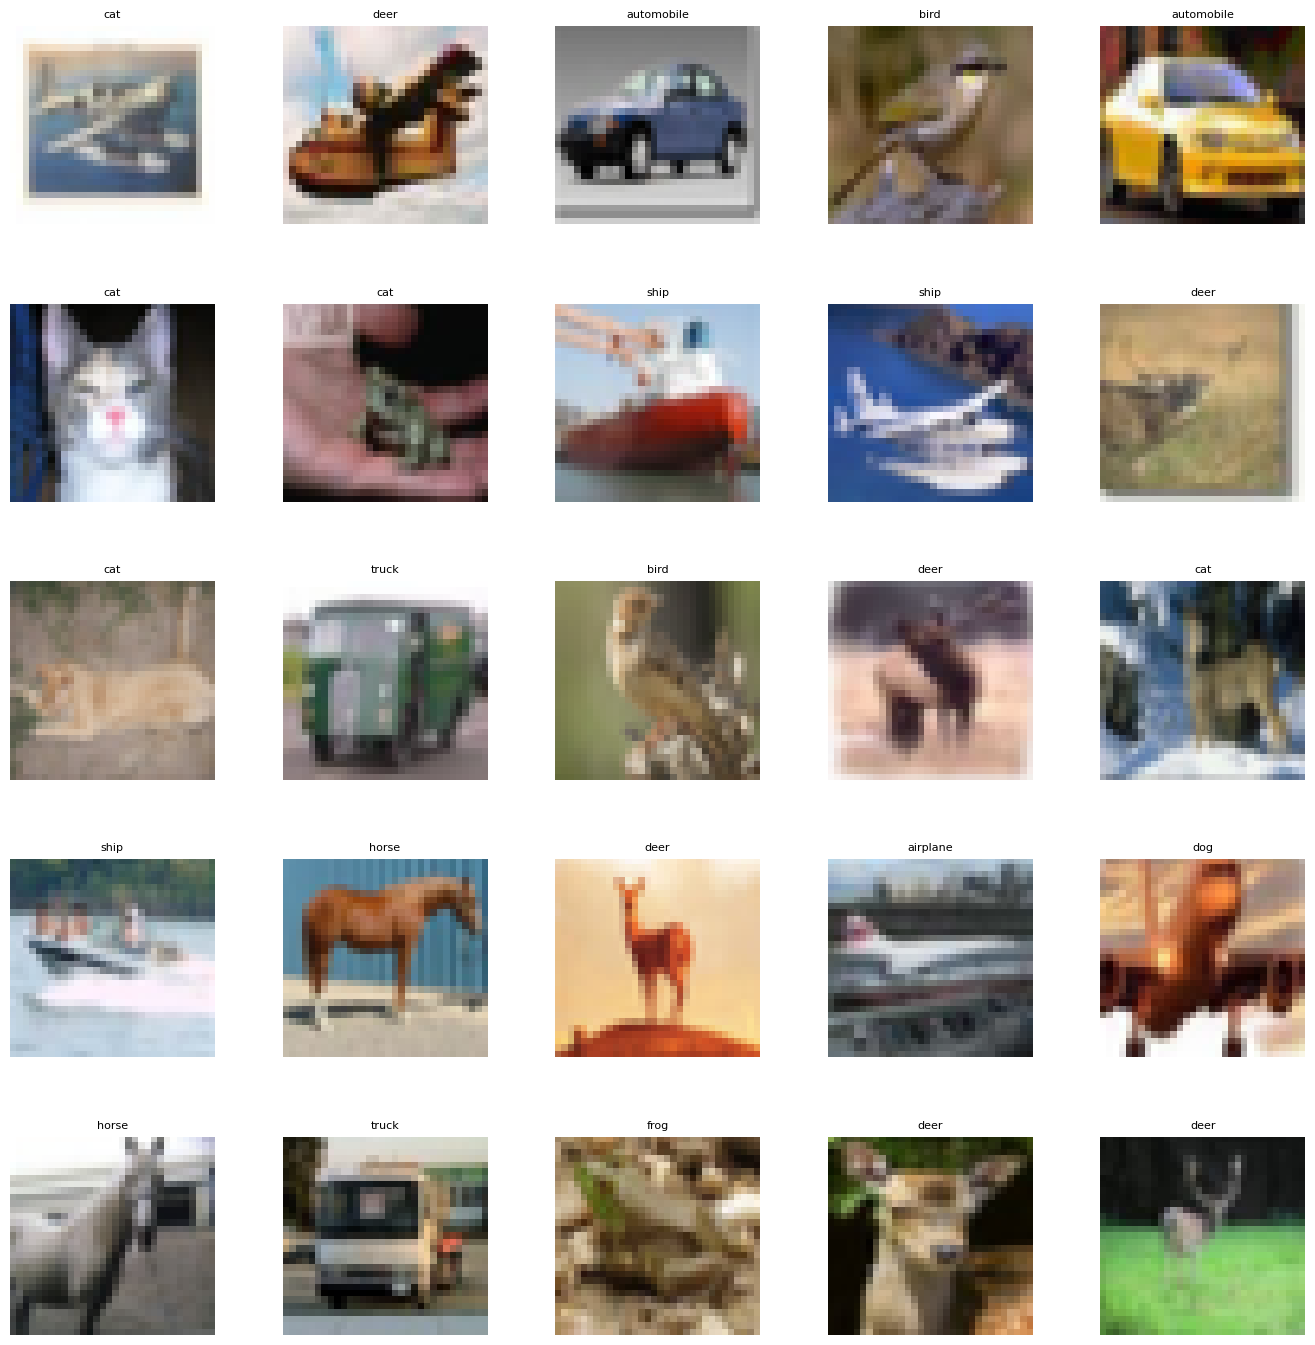

In [ ]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_test = len(X_test)

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_test)
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 2s 7ms/step


<ipython-input-115-1a6f3c8bfb16>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
<ipython-input-115-1a6f3c8bfb16>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


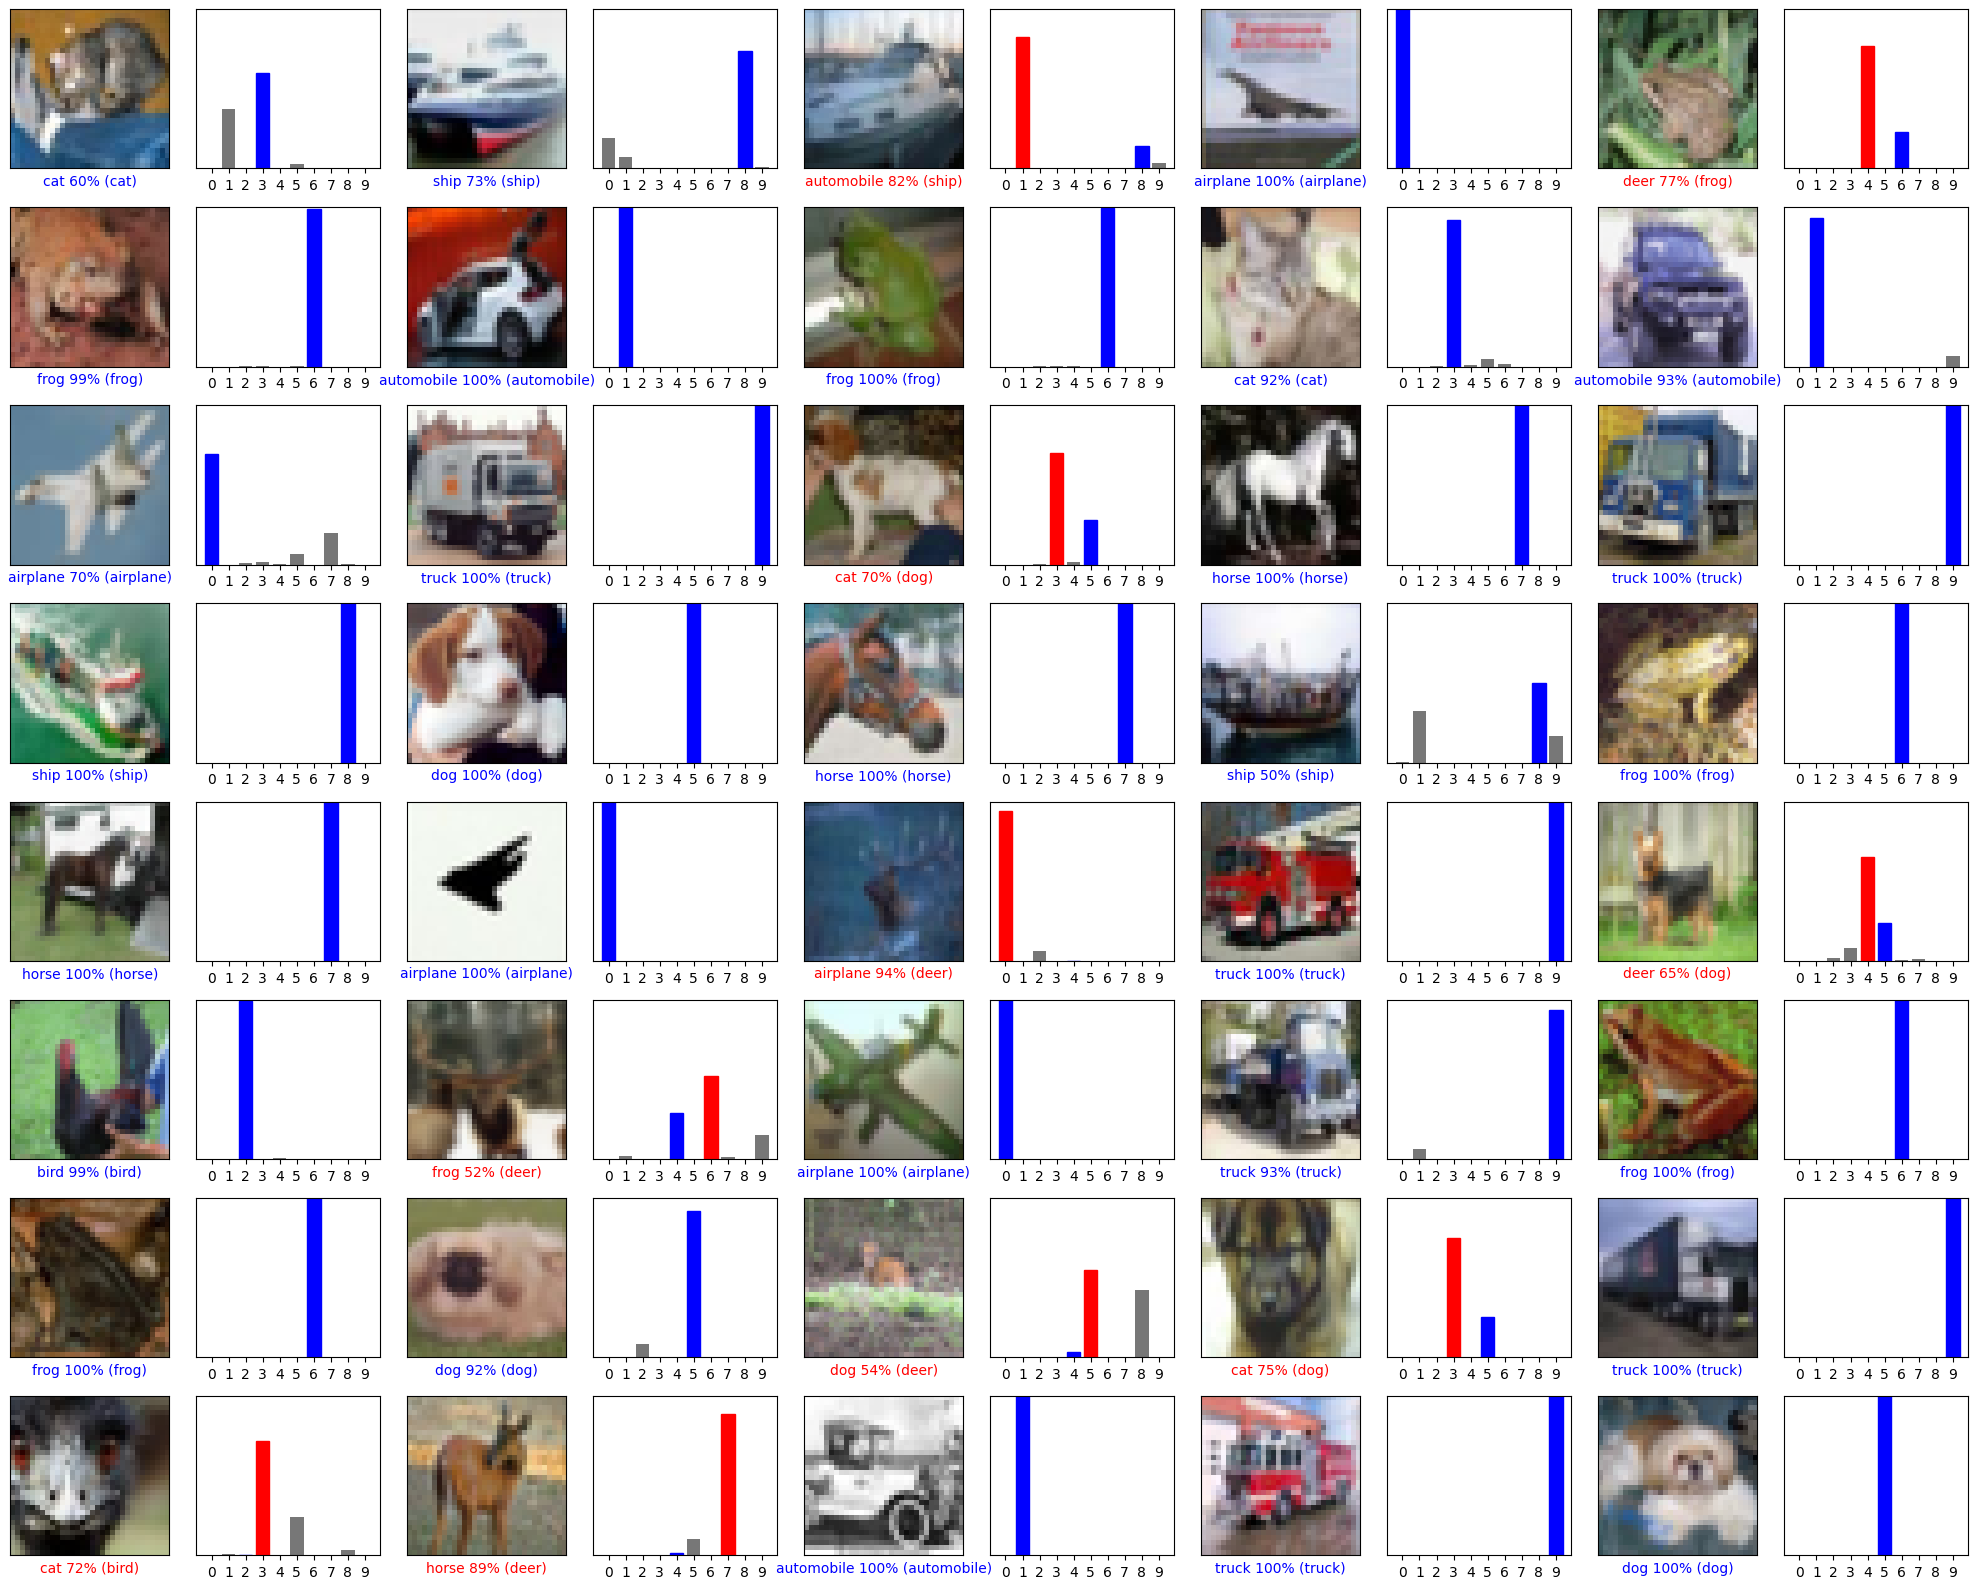

In [ ]:
predictions = model.predict(X_test)

num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()